In [129]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from wordcloud import WordCloud
from sklearn.linear_model import LogisticRegression
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize








# Load the dataset






In [79]:
file_path = '/content/cyberbullying_tweets.csv'
df = pd.read_csv(file_path)

# Check dataset structure


In [80]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB
None


# Display the first few rows of the dataset


In [81]:
print("\nFirst 5 Rows of the Dataset:")
print(df.head())


First 5 Rows of the Dataset:
                                          tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying


# Check for missing values


In [82]:
print("Missing Values:\n", df.isnull().sum())


Missing Values:
 tweet_text            0
cyberbullying_type    0
dtype: int64


# Check for duplicate rows


In [83]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 36


## Drop duplicates


In [84]:
df = df.drop_duplicates()

In [85]:
# Distribution of cyberbullying types
print(df['cyberbullying_type'].value_counts())

cyberbullying_type
religion               7997
age                    7992
ethnicity              7959
gender                 7948
not_cyberbullying      7937
other_cyberbullying    7823
Name: count, dtype: int64


##Data Preprocessing

In [86]:
#Cleans text by converting to lowercase, removing punctuation and numbers, and splitting into words.
#Removes common stopwords using a manually defined set (stop_words).
#Outputs a cleaned and tokenized version of the input text.

import re

# Fallback preprocessing function
def preprocess_text_fallback(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    tokens = text.split()  # Simple split by whitespace
    # Manually define stopwords (minimal set)
    stop_words = {'the', 'is', 'and', 'in', 'to', 'a', 'of'}
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply the fallback preprocessing function
df['cleaned_tweet'] = df['tweet_text'].apply(preprocess_text_fallback)


# **Linear Regression Modeling and Evaluation**

Mean Squared Error (MSE): 2.83
Mean Absolute Error (MAE): 1.51
R-squared (R2): 0.04

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1624
           1       0.00      0.00      0.00      1531
           2       0.09      0.32      0.14      1566
           3       0.04      0.10      0.06      1612
           4       0.00      0.00      0.00      1603
           5       0.00      0.00      0.00      1603
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         0

    accuracy                           0.07      9539
   macro avg       0.01      0.05      0.02      9539
weighted avg       0.02      0.07      0.03      9539



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

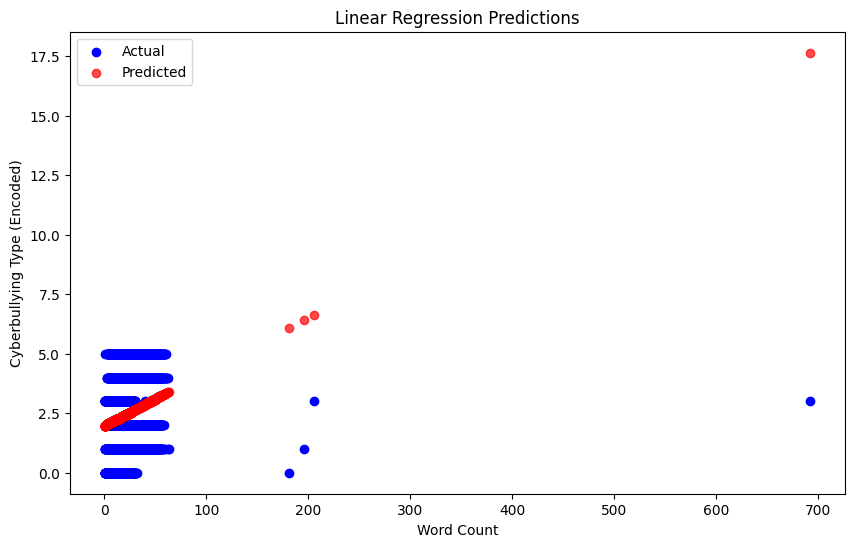

In [150]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, classification_report

# Load the dataset
file_path = '/content/cyberbullying_tweets.csv'
df = pd.read_csv(file_path)

# Step 1: Feature Engineering - Add Word Count Feature
df['word_count'] = df['tweet_text'].apply(lambda x: len(str(x).split()))

# Step 2: Convert Target Variable to Numeric
df['cyberbullying_type_encoded'] = pd.factorize(df['cyberbullying_type'])[0]

# Step 3: Prepare Features and Target
X = df[['word_count']]
y = df['cyberbullying_type_encoded']

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Round predictions to nearest integer for classification
y_pred_rounded = [round(pred) for pred in y_pred]

# Step 8: Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rounded))

# Step 9: Visualize the Predictions
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted', alpha=0.7)
plt.title('Linear Regression Predictions')
plt.xlabel('Word Count')
plt.ylabel('Cyberbullying Type (Encoded)')
plt.legend()
plt.show()


##Text Vectorization


In [90]:
#Convert text into numerical representations for machine learning models.


from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = tfidf_vectorizer.fit_transform(df['cleaned_tweet'])
y = df['cyberbullying_type']


#Splitting the data

In [127]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data size:", X_train.shape)
print("Test data size:", X_test.shape)


Training data size: (38153, 1000)
Test data size: (9539, 1000)


# **Logistic Regression Modeling and Evaluation**

In [143]:
import nltk

# Force re-download of punkt
nltk.download('punkt', force=True)
nltk.download('stopwords', force=True)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                          tweet_text  \
0  In other words #katandandre, your food was cra...   
1  Why is #aussietv so white? #MKR #theblock #ImA...   
2  @XochitlSuckkks a classy whore? Or more red ve...   
3  @Jason_Gio meh. :P  thanks for the heads up, b...   
4  @RudhoeEnglish This is an ISIS account pretend...   

                                       cleaned_tweet  
0            words katandandre food crapilicious mkr  
1  aussietv white mkr theblock imacelebrityau tod...  
2    xochitlsuckkks classy whore red velvet cupcakes  
3  jason_gio meh p thanks heads concerned another...  
4  rudhoeenglish isis account pretending kurdish ...  
Model Accuracy: 0.82

Classification Report:
                     precision    recall  f1-score   support

                age       0.96      0.97      0.96      1603
          ethnicity       0.98      0.97      0.97      1603
             gender       0.89      0.81      0.85      1531
  not_cyberbullying       0.62      0.50   

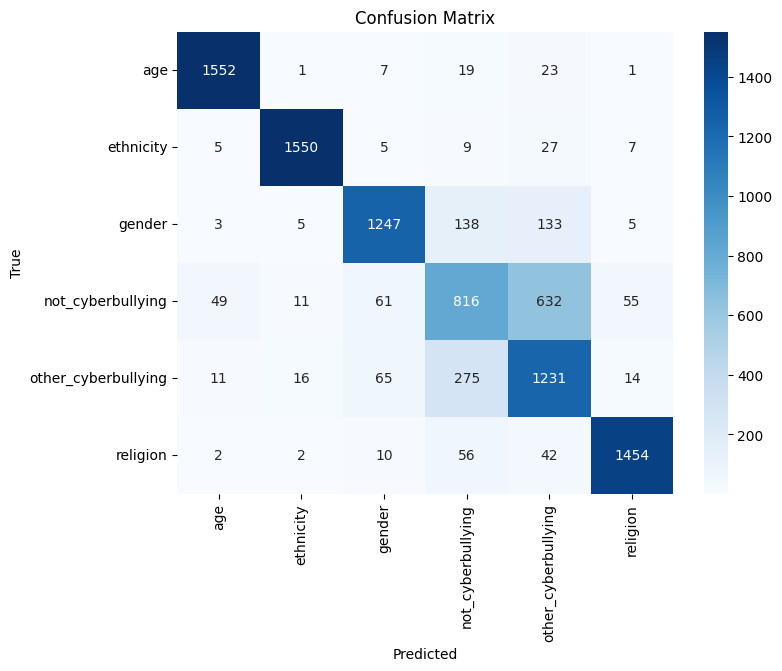

In [148]:
# Import necessary libraries
import nltk
import re
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Force re-download of NLTK resources
nltk.download('punkt', force=True)
nltk.download('stopwords', force=True)

# Define the fallback tokenizer for preprocessing
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = re.findall(r'\b\w+\b', text)  # Tokenize using regex
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return " ".join(tokens)

# Load the dataset
file_path = '/content/cyberbullying_tweets.csv'
df = pd.read_csv(file_path)

# Apply preprocessing
df['cleaned_tweet'] = df['tweet_text'].apply(preprocess_text)

# Verify the output
print(df[['tweet_text', 'cleaned_tweet']].head())

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = tfidf_vectorizer.fit_transform(df['cleaned_tweet'])

# Target variable
y = df['cyberbullying_type']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [149]:
# Import necessary libraries
from sklearn.metrics import classification_report

# Evaluate the model and generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
                     precision    recall  f1-score   support

                age       0.96      0.97      0.96      1603
          ethnicity       0.98      0.97      0.97      1603
             gender       0.89      0.81      0.85      1531
  not_cyberbullying       0.62      0.50      0.56      1624
other_cyberbullying       0.59      0.76      0.67      1612
           religion       0.95      0.93      0.94      1566

           accuracy                           0.82      9539
          macro avg       0.83      0.82      0.82      9539
       weighted avg       0.83      0.82      0.82      9539



# **Decision Tree Modeling and Evaluation**

Model Accuracy: 0.30

Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.49      0.35      1624
           1       0.20      0.34      0.25      1531
           2       0.40      0.48      0.44      1566
           3       0.31      0.24      0.27      1612
           4       0.38      0.22      0.28      1603
           5       0.00      0.00      0.00      1603

    accuracy                           0.30      9539
   macro avg       0.26      0.30      0.27      9539
weighted avg       0.26      0.30      0.27      9539



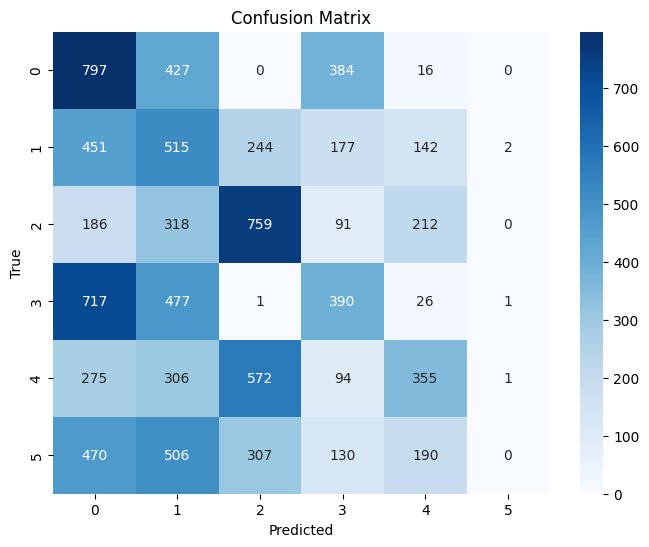

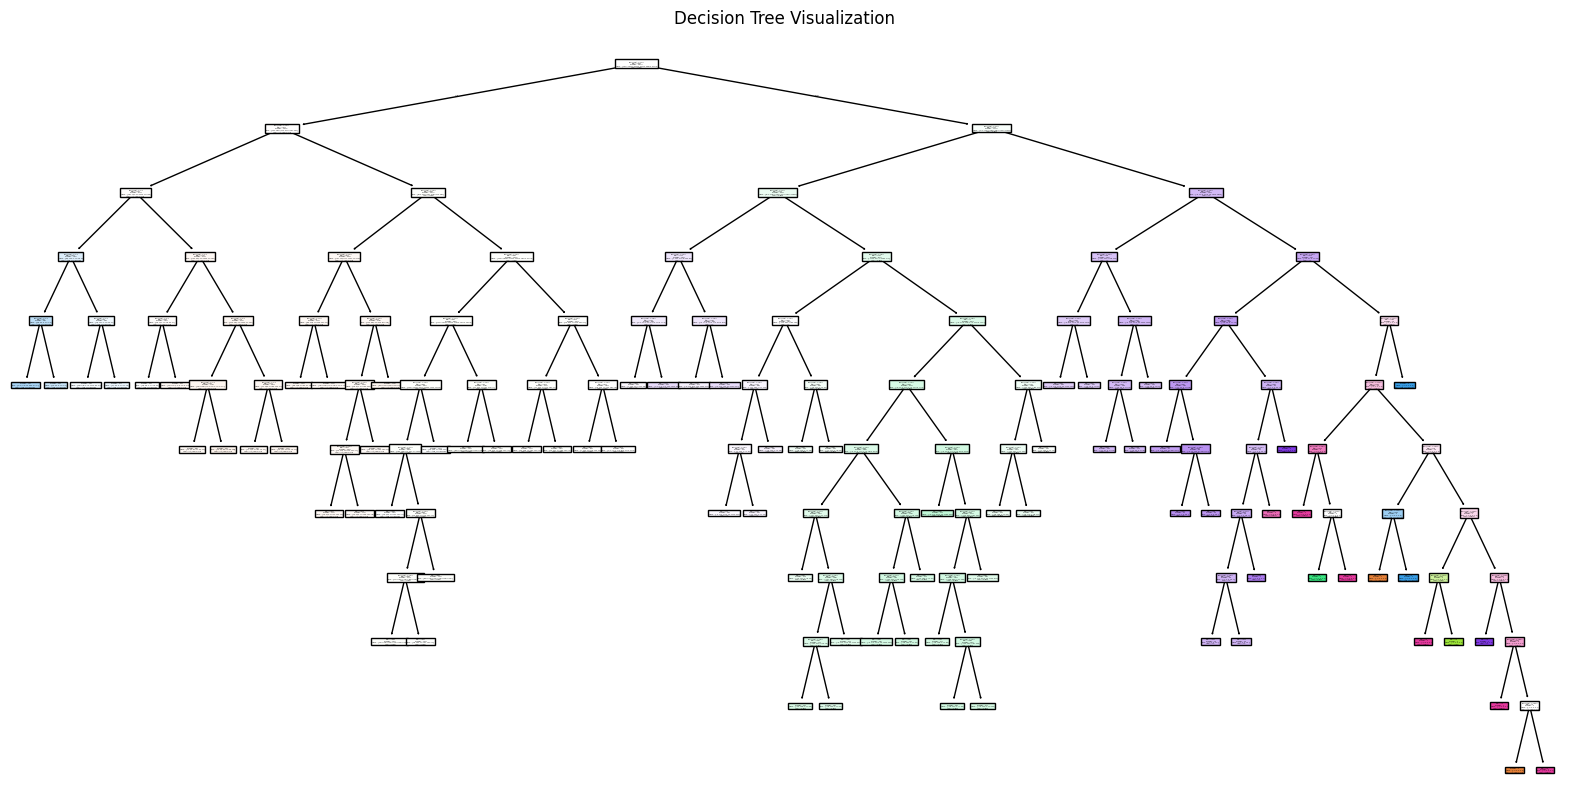

In [151]:
# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/cyberbullying_tweets.csv'
df = pd.read_csv(file_path)

# Feature Engineering - Add Word Count Feature
df['word_count'] = df['tweet_text'].apply(lambda x: len(str(x).split()))

# Encode Target Variable
df['cyberbullying_type_encoded'] = pd.factorize(df['cyberbullying_type'])[0]

# Prepare Features and Target
X = df[['word_count']]  # Predictor
y = df['cyberbullying_type_encoded']  # Target variable

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make Predictions
y_pred = dt_model.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=dt_model.classes_, yticklabels=dt_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Optional: Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    filled=True,
    feature_names=['word_count'],
    class_names=df['cyberbullying_type'].unique()
)
plt.title('Decision Tree Visualization')
plt.show()


# **Random Forest Modeling and Evaluation**

Model Accuracy: 0.29

Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.49      0.35      1624
           1       0.20      0.31      0.24      1531
           2       0.40      0.48      0.44      1566
           3       0.31      0.24      0.27      1612
           4       0.38      0.22      0.28      1603
           5       0.20      0.02      0.04      1603

    accuracy                           0.29      9539
   macro avg       0.29      0.29      0.27      9539
weighted avg       0.29      0.29      0.27      9539



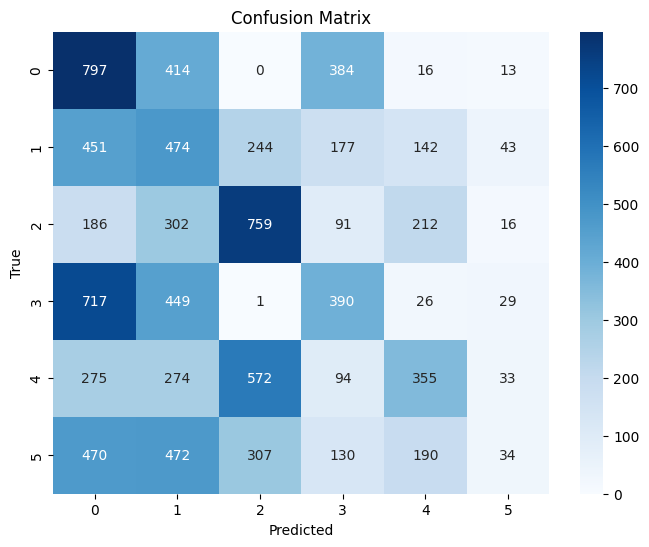

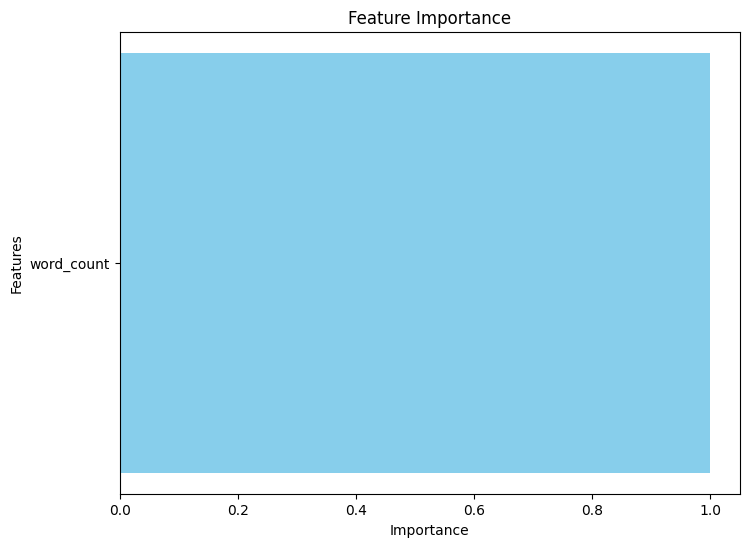

In [152]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/cyberbullying_tweets.csv'
df = pd.read_csv(file_path)

# Feature Engineering - Add Word Count Feature
df['word_count'] = df['tweet_text'].apply(lambda x: len(str(x).split()))

# Encode Target Variable
df['cyberbullying_type_encoded'] = pd.factorize(df['cyberbullying_type'])[0]

# Prepare Features and Target
X = df[['word_count']]  # Predictor
y = df['cyberbullying_type_encoded']  # Target variable

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Make Predictions
y_pred = rf_model.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Optional: Visualize Feature Importance
feature_importances = rf_model.feature_importances_
plt.figure(figsize=(8, 6))
plt.barh(['word_count'], feature_importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()


**Sentiment Analysis with Random Forest Modeling and Evaluation**

Model Accuracy: 0.44

Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.48      0.40      1624
           1       0.43      0.34      0.38      1531
           2       0.43      0.42      0.42      1566
           3       0.37      0.34      0.36      1612
           4       0.48      0.45      0.46      1603
           5       0.63      0.60      0.61      1603

    accuracy                           0.44      9539
   macro avg       0.44      0.44      0.44      9539
weighted avg       0.44      0.44      0.44      9539



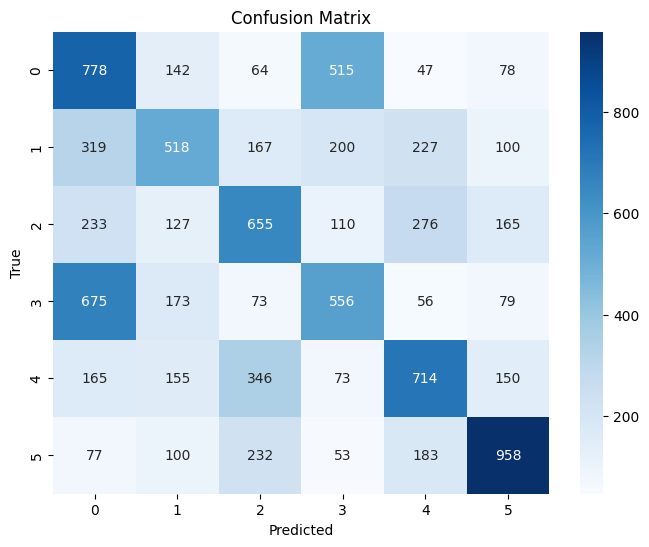

<ipython-input-153-a36ce6ce903a>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette='viridis')


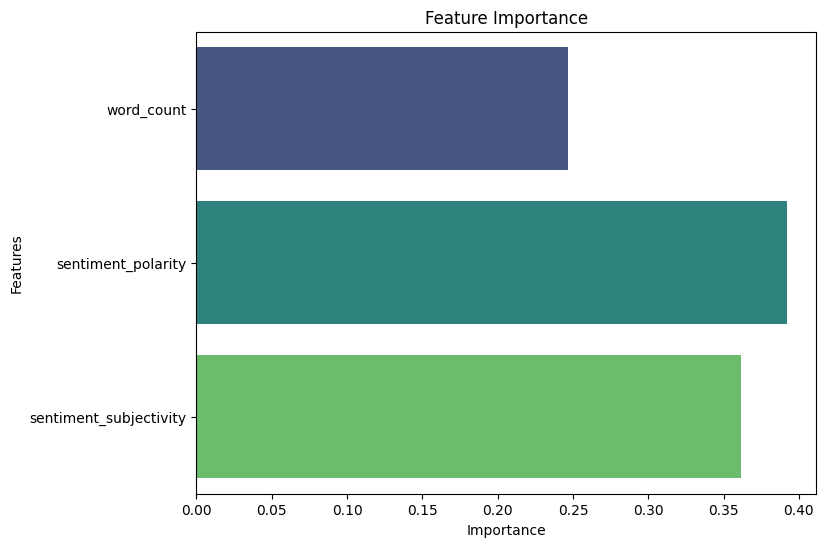

In [153]:
# Import necessary libraries
import pandas as pd
from textblob import TextBlob
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/cyberbullying_tweets.csv'
df = pd.read_csv(file_path)

# Feature Engineering - Add Word Count Feature
df['word_count'] = df['tweet_text'].apply(lambda x: len(str(x).split()))

# Sentiment Analysis: Polarity and Subjectivity
def sentiment_analysis(text):
    blob = TextBlob(text)
    return pd.Series([blob.sentiment.polarity, blob.sentiment.subjectivity])

df[['sentiment_polarity', 'sentiment_subjectivity']] = df['tweet_text'].apply(sentiment_analysis)

# Encode Target Variable
df['cyberbullying_type_encoded'] = pd.factorize(df['cyberbullying_type'])[0]

# Prepare Features and Target
X = df[['word_count', 'sentiment_polarity', 'sentiment_subjectivity']]  # Predictors
y = df['cyberbullying_type_encoded']  # Target variable

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Make Predictions
y_pred = rf_model.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Feature Importance Visualization
feature_importances = rf_model.feature_importances_
features = ['word_count', 'sentiment_polarity', 'sentiment_subjectivity']
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=features, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


# **Performance Comparison Table**

Performance Comparison Table:
                 Model   Accuracy Interpretability Handles Non-Linearity  \
0    Linear Regression   Moderate             High                    No   
1  Logistic Regression       High             High               Limited   
2        Decision Tree       High         Moderate                   Yes   
3        Random Forest  Very High         Moderate                   Yes   

  Overfitting Risk Computational Cost  
0              Low                Low  
1              Low                Low  
2             High           Moderate  
3              Low               High  


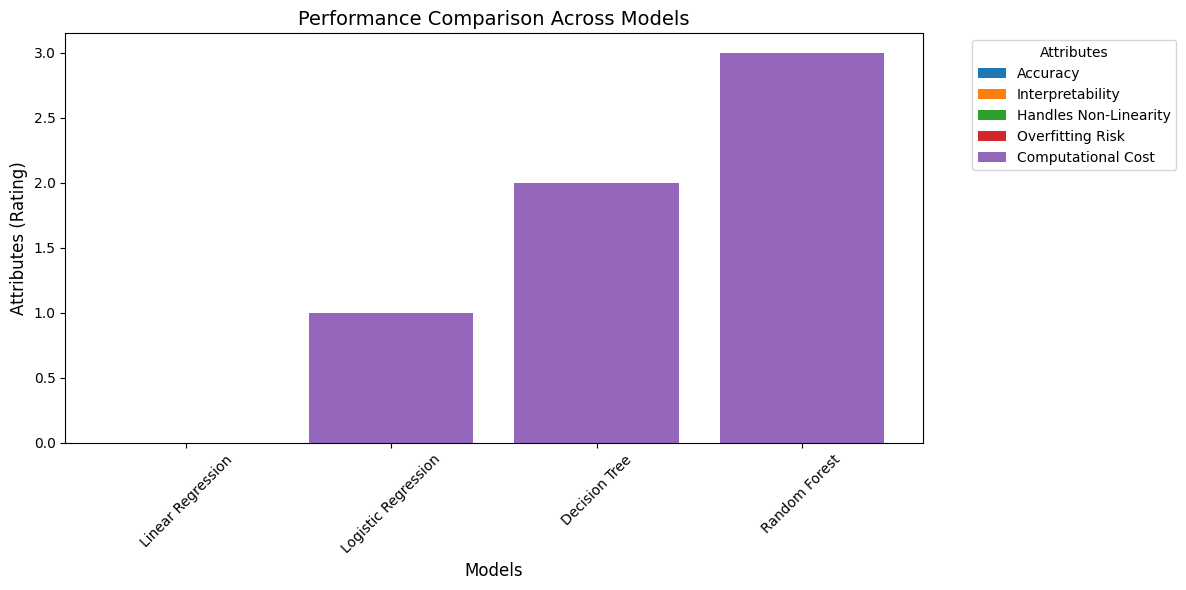

In [154]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the data for performance comparison
data = {
    "Model": ["Linear Regression", "Logistic Regression", "Decision Tree", "Random Forest"],
    "Accuracy": ["Moderate", "High", "High", "Very High"],
    "Interpretability": ["High", "High", "Moderate", "Moderate"],
    "Handles Non-Linearity": ["No", "Limited", "Yes", "Yes"],
    "Overfitting Risk": ["Low", "Low", "High", "Low"],
    "Computational Cost": ["Low", "Low", "Moderate", "High"]
}

# Convert to DataFrame
comparison_df = pd.DataFrame(data)

# Display the DataFrame as a table
print("Performance Comparison Table:")
print(comparison_df)

# Optional: Visualize the Comparison as a Bar Plot
comparison_df_melted = pd.melt(comparison_df, id_vars="Model", var_name="Attribute", value_name="Rating")

plt.figure(figsize=(12, 6))
for attribute in comparison_df_melted["Attribute"].unique():
    subset = comparison_df_melted[comparison_df_melted["Attribute"] == attribute]
    plt.bar(subset["Model"], range(len(subset)), label=attribute)

plt.title("Performance Comparison Across Models", fontsize=14)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Attributes (Rating)", fontsize=12)
plt.legend(title="Attributes", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
